In [2]:
from manim import *
config.media_width = "100%"
_RV = "-v WARNING -qm --progress_bar None --disable_caching Example"
_RI = "-v WARNING -ql -s --progress_bar None --disable_caching Example"

Manim Community v0.17.2

```                                               
                                     ┌───▶mob.set() | MCE                         
                                     │                                            
                                     ├───▶mob.set_width() | MGL                   
                                     │                                            
                                     ├───▶mob.set_height() | MGL                  
                                     │                                            
                                     ├───▶mob.scale_to_fit_width() | MCE (almost not used)       
                    ┌────▶Without ───┤                                            
                    │     stretch    ├───▶mob.scale_to_fit_height() | MCE (almost not used)        
                    │                │                                            
                    │                ├───▶mob.match_width() | MCE-MGL             
                    │                │                                            
                    │                ├───▶mob.match_height() | MCE-MGL            
                    │                │                                            
Transformations─────┤                └───▶mob.scale() | MCE-MGL                   
                    │                                                             
                    │                ┌───▶mob.stretch_to_fit_width() | MCE-MGL    
                    ├────▶With ──────┤                                             
                    │     stretch    └───▶mob.stretch_to_fit_height() | MCE-MGL   
                    │                                                             
                    │                ┌───▶mob.rotate() | MCE-MGL                  
                    ├────▶Rotations ─┤                                           
                    │                └───▶mob.flip() | MCE-MGL                    
                    │                                                             
                    └────▶Specific ──────▶mob.apply_matrix() | MCE-MGL            
                                                   
```

## a) Without stretch
### <u><span style="color:red">Caution</span>: `set` is only valid for ManimCE</u>

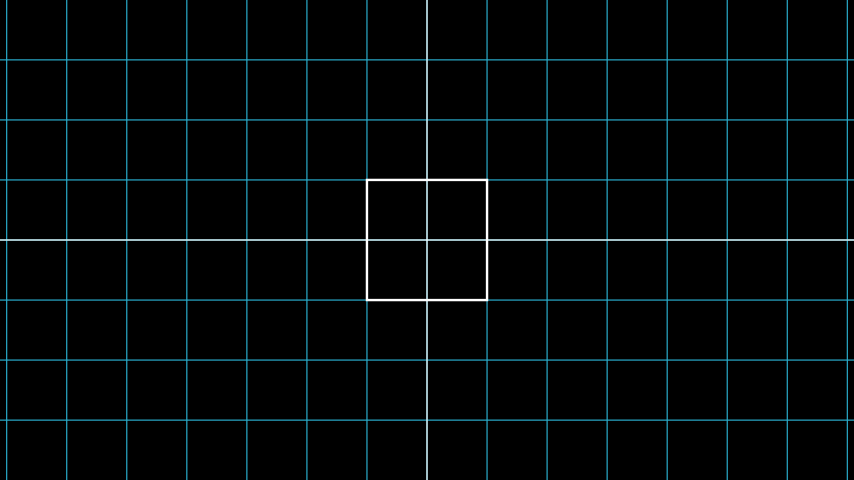

In [4]:
class Example(Scene):
    def construct(self):
        mob = Square()
        # mob.─ = 4
        # mob.height = 6
        # mob.set(width=4)
        # mob.set(width=6)
        self.add(NumberPlane(), mob)

%manim $_RI

The `mob.set(attr=val)` method (ManimCE only) is used to define any attribute.
So instead of having to do this:

```py
mob.some_attr = some_val
```

can be replaced by this:

```py
mob.set(some_attr=some_val)
```

You can implement the set method in ManimGL, but you would have to modify the source code.

Go to `manimlib/mobject/mobject.py` and add this method to `Mobject` class:

```py
def set(self, **kwargs):
    for attr, value in kwargs.items():
        setattr(self, attr, value)

    return self
```

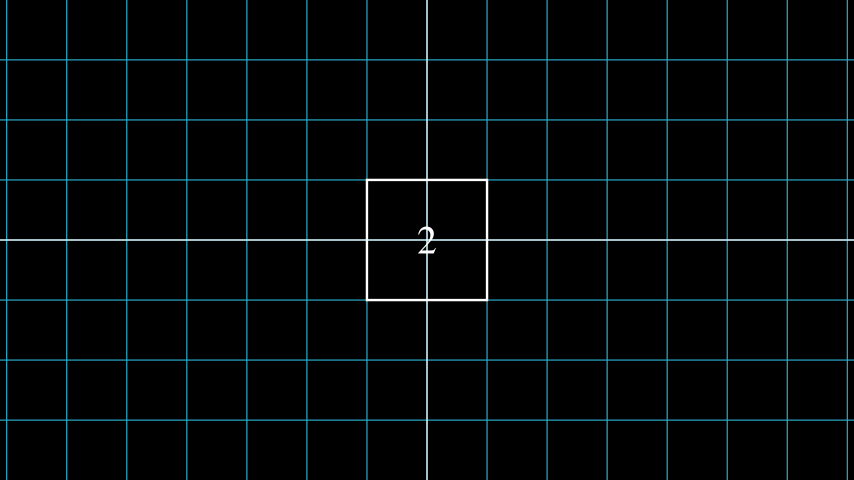

In [23]:
class Example(Scene):
    def construct(self):
        mob = Square()
        t = Text("2")

        # t.match_width(mob)
        # t.match_height(mob)

        self.add(NumberPlane(), mob, t)

%manim $_RI

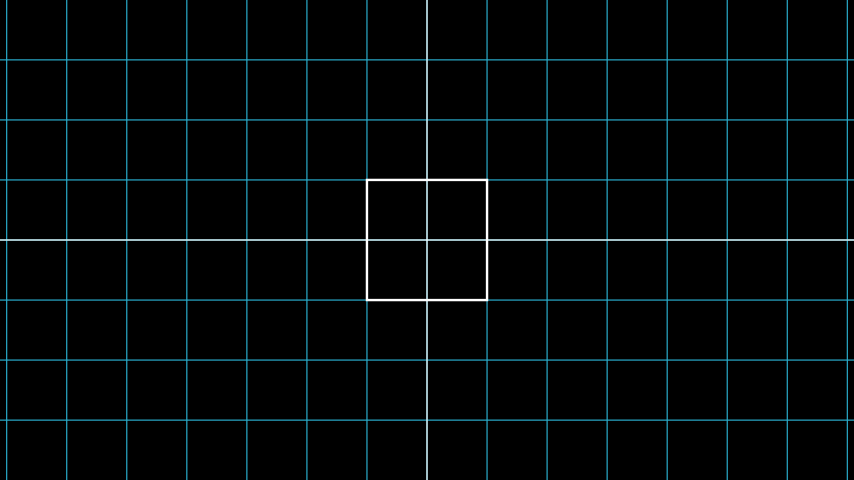

In [3]:
class Example(Scene):
    def construct(self):
        mob = Square()

        # mob.scale(1) # this does not change the size
        # mob.scale(2)
        # mob.scale(3)
        # mob.scale(0.5)

        self.add(NumberPlane(), mob)

%manim $_RI

## b) With stretch

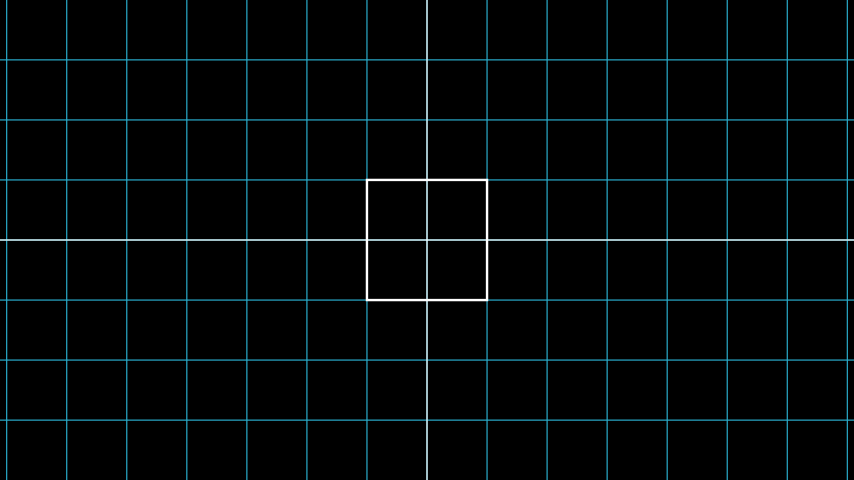

In [21]:
class Example(Scene):
    def construct(self):
        mob = Square()
        
        # mob.stretch_to_fit_height(4)
        # mob.stretch_to_fit_width(4)

        self.add(NumberPlane(), mob)

%manim $_RI

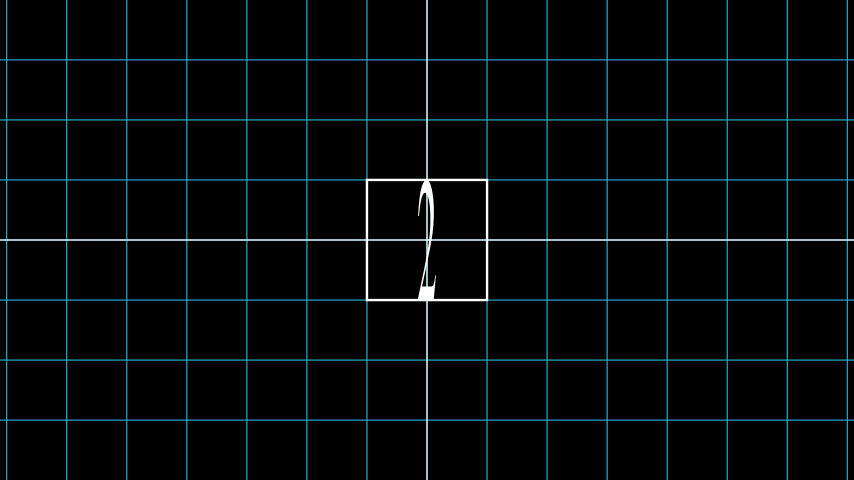

In [25]:
class Example(Scene):
    def construct(self):
        mob = Square()
        t = Text("2")

        # t.match_width(mob, stretch=True)
        # t.match_height(mob, stretch=True)

        self.add(NumberPlane(), mob, t)

%manim $_RI

#### `mob.scale([x,y,z])` only for ManimCE

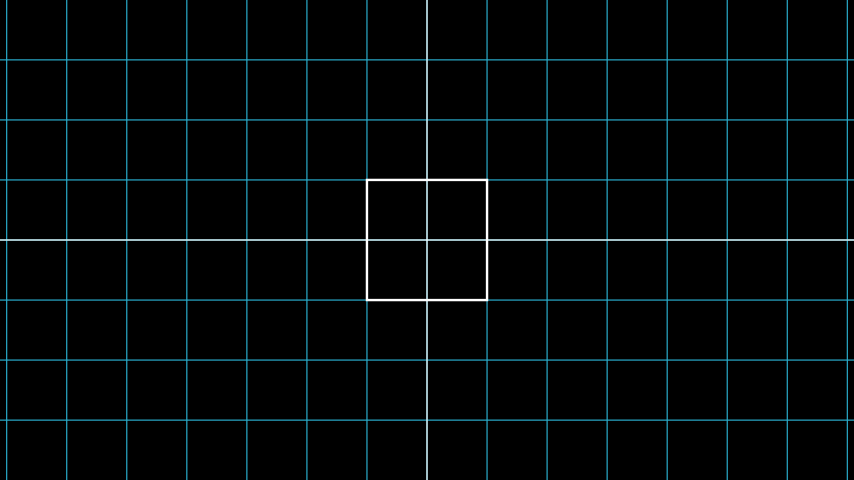

In [10]:
class Example(Scene):
    def construct(self):
        mob = Square()
        #         [width scale, height scale, depth scale]
        mob.scale([1,1,1])

        self.add(NumberPlane(), mob)

%manim $_RI

## c) Rotations

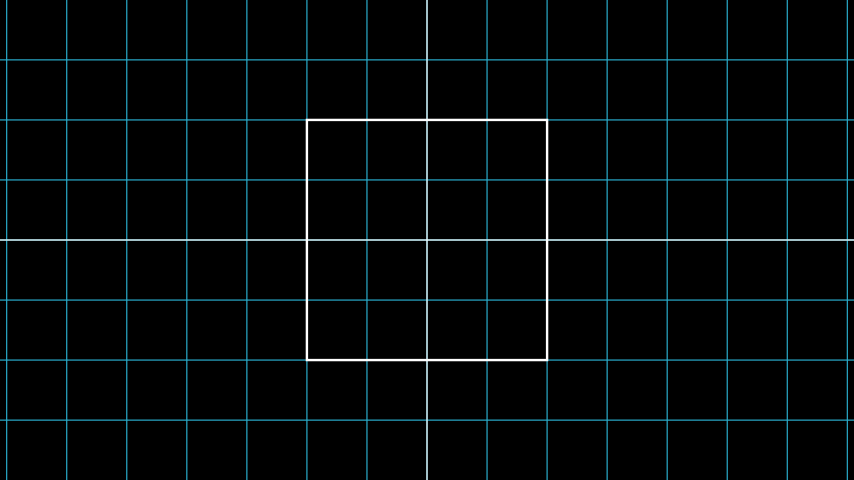

In [43]:
class Example(Scene):
    def construct(self):
        mob = Square().scale(2)

        # PI === np.pi
        # mob.rotate(PI/4)
        # mob.rotate(45 * DEGREES)

        self.add(NumberPlane(), mob)

%manim $_RI

### Be careful with the centers!

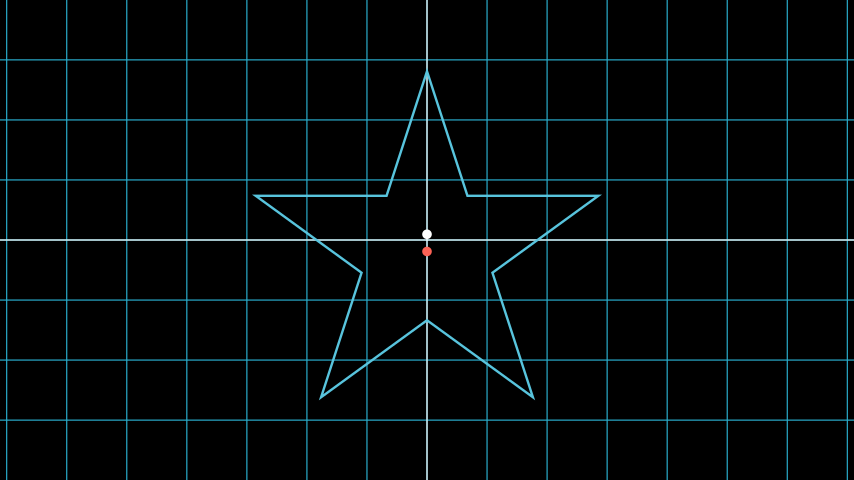

In [55]:
class Example(Scene):
    def construct(self):
        mob = Star().scale(3)

        dot1 = Dot(mob.get_center()) # same as Dot1().move_to(mob1)
        dot2 = Dot(mob.get_center_of_mass(), color=RED)

        self.add(NumberPlane(), mob, dot1, dot2)

%manim $_RI

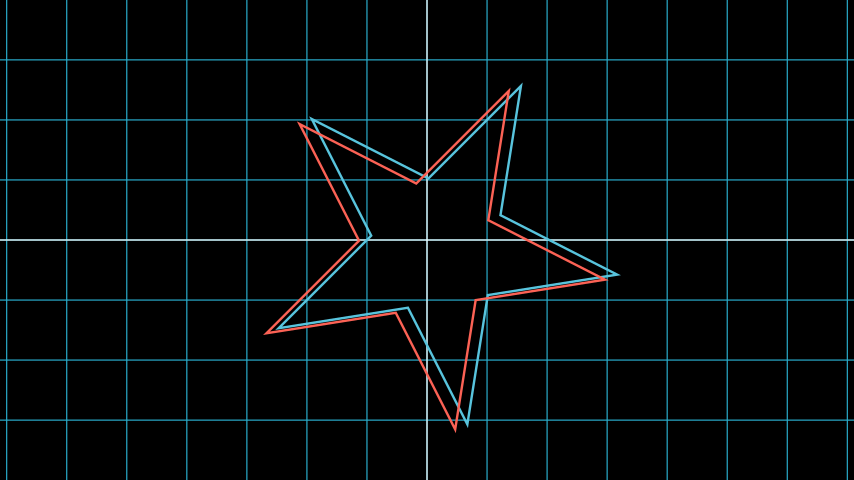

In [56]:
class Example(Scene):
    def construct(self):
        mob1 = Star().scale(3)
        mob2 = Star(color=RED).scale(3)

        mob1.rotate(PI/4)
        # same as:
        # mob1.rotate(PI/4, about_point=mob1.get_center())
        mob2.rotate(PI/4, about_point=mob2.get_center_of_mass())

        self.add(NumberPlane(), mob1, mob2)

%manim $_RI

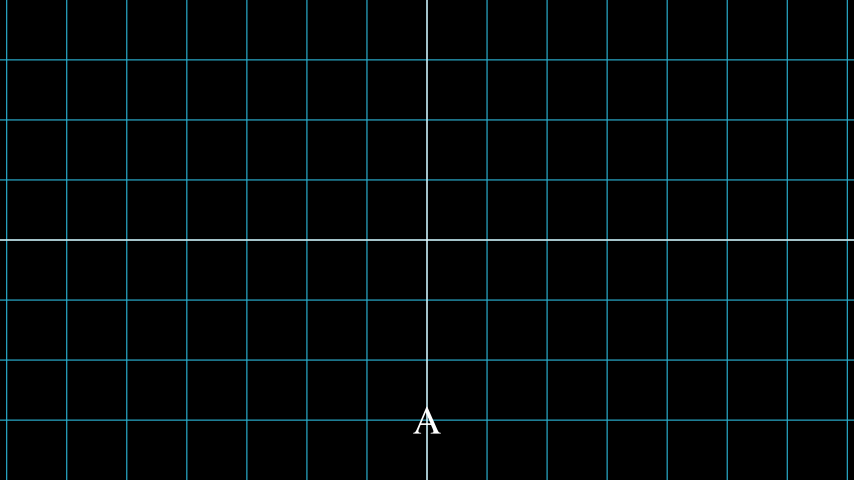

In [11]:
class Example(Scene):
    def construct(self):
        mob = Text("A").shift(DOWN*3)

        # mob.rotate(45*DEGREES, about_point=ORIGIN)    

        self.add(NumberPlane(), mob)

%manim $_RI

### Your homework: What does `mob.flip()`?

## d) Specific transformations using a linear transformation

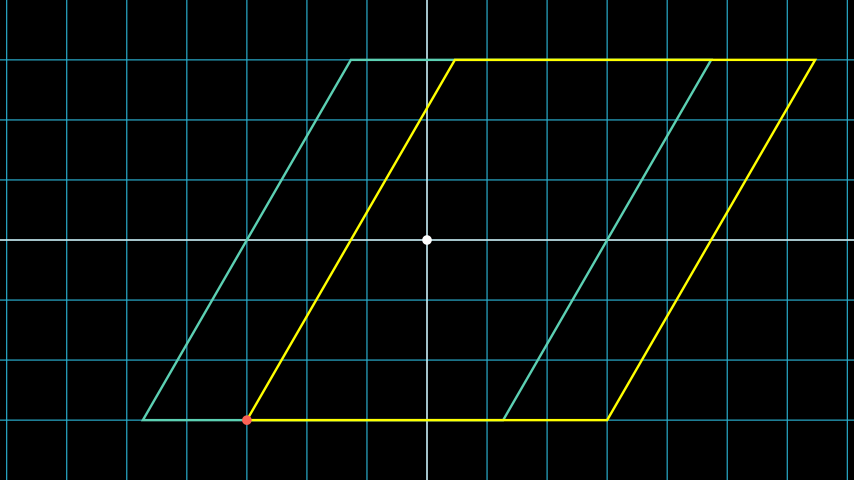

In [12]:
class Example(Scene):
    def construct(self):
        mob1 = Square(color=TEAL).scale(3)
        mob2 = Square(color=YELLOW).scale(3)

        ref1 = Dot()
        ref2 = Dot(mob1.get_corner(DL), color=RED)

        P = np.tan(30 * DEGREES)

        matrix = [
            [1, P, 0],
            [0, 1, 0],
            [0, 0, 1],
        ]

        mob1.apply_matrix(matrix, about_point=ref1.get_center())
        mob2.apply_matrix(matrix, about_point=ref2.get_center())

        self.add(NumberPlane(), mob1, mob2, ref1, ref2)

%manim $_RI